In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# Генерация данных

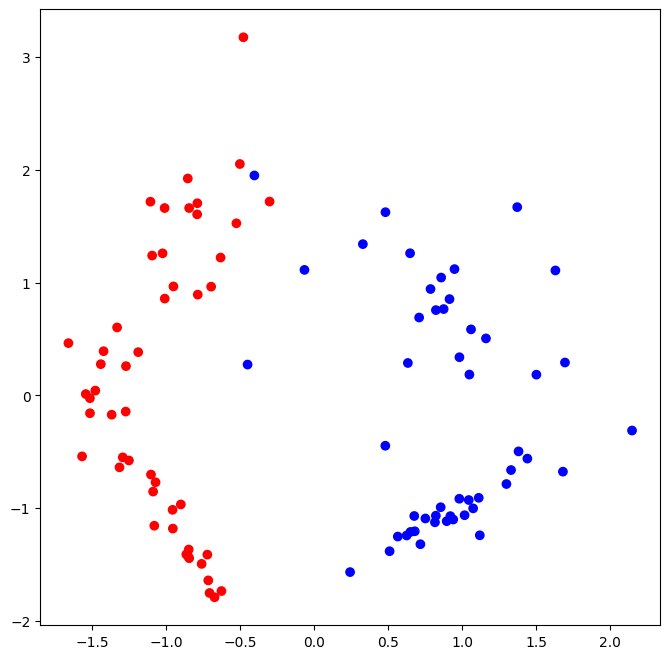

In [101]:
# сгеренируем данные
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()

# Перемешивание датасета

In [102]:
# перемешивание датасета
np.random.seed(13) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


# Обучение методом логистической регрессии

In [103]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(w, X, y):
    # здесь должны быть рассчитаны параметры градиента и значение функции потерь
    n=X.shape[0] # Количемтво объектов
    z=np.dot(X,w) # Вектор линейной операции
    y_hat=sigmoid(z)
    e=1e-15
    loss=-np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) # значение функции потерь
    error=y_hat-y # значение ошибки
    grad=(1/n) * np.dot(X.T, error) # градиент
    return loss, grad

def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []

    for i in range(n_iterations):
        # считаем веса
        loss, grad = log_loss(w,X,y)
        w -= eta * grad
        losses.append(loss)

    return w, losses

def predict(w, X, b=0.5):
    z=np.dot(X,w)
    A=sigmoid(z)
    y_predicted=[]
    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if A[i] >= b:
            y_predicted.append(1)
        else:
            y_predicted.append(0)
        
    return y_predicted

# Тестирование алгоритма

In [104]:
# инициализируем начальный вектор весов
w0 = np.zeros((X_train.shape[1]))

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")


Итоговый вектор весов w: [3.8087905  0.12725242]
Точность на обучающей выборке: 97.143
Точность на тестовой выборке: 96.667


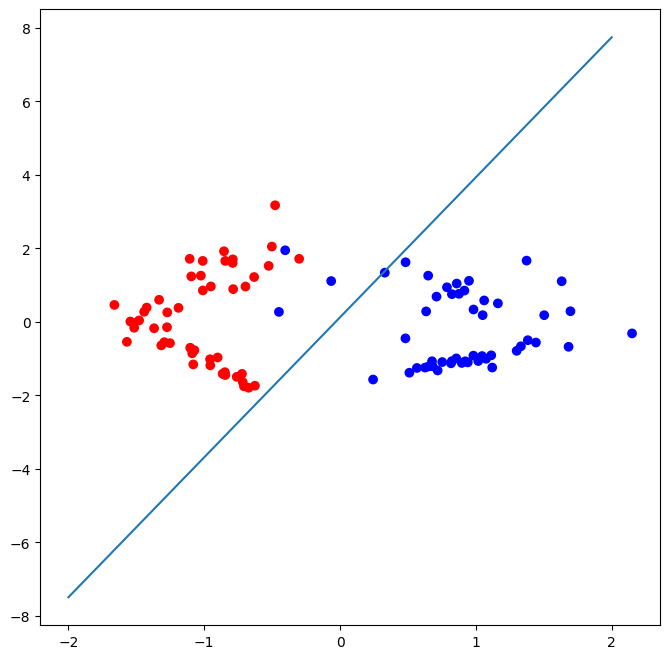

In [105]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, w[0]*data+w[1])

plt.show()

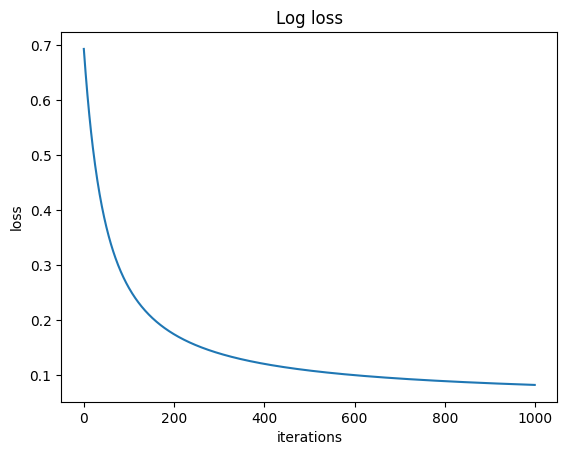

In [106]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

plt.show()

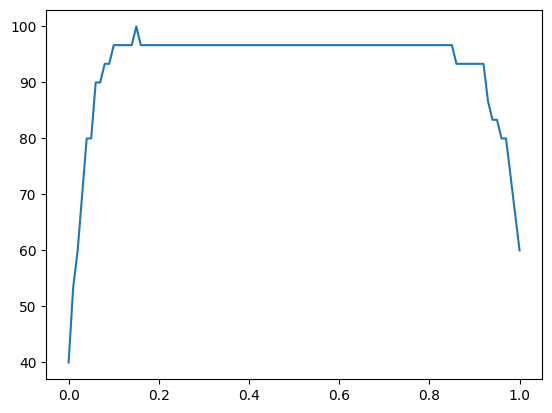

In [107]:
test_acc = []
b_l = []

for b in range(0, 101):
  y_predicted_test = predict(w, X_test, b/100)
  y_predicted_train = predict(w, X_train, b/100)

  # В качестве меры точности возьмем долю правильных ответов

  test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

  b_l.append(b/100)
  test_acc.append(test_accuracy)

plt.plot(b_l, test_acc)
plt.show()

Дополнительные вопросы:

**Как влияет размер шага (eta) на сходимость алгоритма?**

Размер шага (eta) влияет на сходимость нелинейно и требует тщательного подбора.
При предельно маленьком eta, потребуется много шагов алгоритма, что требует дополнительных мощностей вычисления. При очень большом eta алгоритм может стать не стабильным и не сходиться вовсе.

**Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций (n_iterations)?**

Если выбрать слишком маленькое количество итераций, то мы получим большую ошибку при обучении. Если же мы веберем слишком большое значение итераций, то можем столкнуться с переобучением или избыточно затрачеваемой мощностью вычисления без заметного улучшения результата.

**Почему логистическая регрессия подходит для задач только бинарной классификации?**

Логистическая регрессия моделирует вероятность принадлежности объекта к одному из двух классов с помощью сигмоидной функции. Она в свою очередь определяет вероятность для двух классов, что иделаьно подходит для бинарной классификации. 
